In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the dataset

In [93]:
 t_df = pd.read_csv("globalterrorism.csv", encoding ="latin-1")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17692\817044013.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  t_df = pd.read_csv("globalterrorism.csv", encoding ="latin-1")


In [3]:
t_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970000e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970000e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970000e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#### To view the shape of dataset

In [4]:
print("there are {} rows and {} columns in the datastet ".format(t_df.shape[0],t_df.shape[1]))

there are 181691 rows and 135 columns in the datastet 


In [5]:
t_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

#### checking the uniqueness of the cols of the dataset

no_of_cols=t_df.columns.nunique()
print("there are total %d columns in the data"%no_of_cols)

#### Renaming the cols that we are using

In [7]:
t_df=t_df.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country1','region_txt':'region1',
                          'provstate':'state','city':'city','attacktype1_txt':'attack_type','targtype1_txt':'target_type',
                          'targsubtype1_txt':'target_subtype','gname':'gang_name','weaptype1_txt':'weapon_type'})

In [9]:
t_df.head()

,eventid,year,month,day,approxdate,extended,resolution,country,country1,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970000e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970000e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970000e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### selecting only those cols which are actually required

In [10]:
t_df=t_df[['year','month','day','country1','region1','state','city','attack_type','target_type','target_subtype','gang_name','weapon_type']]

In [11]:
t_df.head()

,year,month,day,country1,region1,state,city,attack_type,target_type,target_subtype,gang_name,weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary


#### Checkin the updated shape of the dataset

In [12]:
t_df.shape

(181691, 12)

#### checking for the null values

In [13]:
t_df.isnull().sum()

year                  0
month                 0
day                   0
country1              0
region1               0
state               421
city                434
attack_type           0
target_type           0
target_subtype    10373
gang_name             0
weapon_type           0
dtype: int64

#### filiing the Nan values

In [14]:
t_df['target_subtype']=t_df['target_subtype'].fillna('others')

In [15]:
t_df['state']=t_df['state'].fillna('unknown')

In [17]:
t_df['city']=t_df['city'].fillna('unknown')

In [19]:
t_df.replace( {"vehicle(not to include vehicle borne explosives, i.e. , car or truck bombs)" : "vehicle"},inplace = True)

In [20]:
t_df

,year,month,day,country1,region1,state,city,attack_type,target_type,target_subtype,gang_name,weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,Military Checkpoint,Al-Shabaab,Firearms
181687,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,Explosives
181688,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary
181689,2017,12,31,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Government Building/Facility/Office,Unknown,Explosives


In [21]:
t_df.shape

(181691, 12)

In [22]:
t_df.isnull().sum()

year              0
month             0
day               0
country1          0
region1           0
state             0
city              0
attack_type       0
target_type       0
target_subtype    0
gang_name         0
weapon_type       0
dtype: int64

In [24]:
t_df.head(10)

,year,month,day,country1,region1,state,city,attack_type,target_type,target_subtype,gang_name,weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
5,1970,1,1,United States,North America,Illinois,Cairo,Armed Assault,Police,"Police Building (headquarters, station, school)",Black Nationalists,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,Assassination,Police,Police Security Forces/Officers,Tupamaros (Uruguay),Firearms
7,1970,1,2,United States,North America,California,Oakland,Bombing/Explosion,Utilities,Electricity,Unknown,Explosives
8,1970,1,2,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,New Year's Gang,Incendiary
9,1970,1,3,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,New Year's Gang,Incendiary


In [25]:
t_df.columns.unique()

Index(['year', 'month', 'day', 'country1', 'region1', 'state', 'city',
       'attack_type', 'target_type', 'target_subtype', 'gang_name',
       'weapon_type'],
      dtype='object')

In [26]:
t_df.columns.nunique()

12

In [31]:
Total_countries=t_df['country1'].nunique()
print("total %d countries were noted in the data"%Total_countries)

total 205 countries were noted in the data


In [33]:
print(t_df['region1'].unique())

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']


In [35]:
print(t_df['attack_type'].unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [36]:
print(t_df['target_type'].unique())

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']


In [37]:
print(t_df['gang_name'].unique())

['MANO-D' '23rd of September Communist League' 'Unknown' ...
 'Fatoni Warriors' 'Minorities of Metropolitan Attacks'
 'Baloch Republican Party']


In [38]:
print(t_df['gang_name'].nunique())

3537


In [41]:
print(t_df['weapon_type'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'
 'Fake Weapons' 'Radiological' 'Other' 'Biological']


In [42]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   year            181691 non-null  int64 
 1   month           181691 non-null  int64 
 2   day             181691 non-null  int64 
 3   country1        181691 non-null  object
 4   region1         181691 non-null  object
 5   state           181691 non-null  object
 6   city            181691 non-null  object
 7   attack_type     181691 non-null  object
 8   target_type     181691 non-null  object
 9   target_subtype  181691 non-null  object
 10  gang_name       181691 non-null  object
 11  weapon_type     181691 non-null  object
dtypes: int64(3), object(9)
memory usage: 16.6+ MB


In [43]:
t_df.describe()

,year,month,day
count,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505650
std,13.259430,3.388303,8.814043
min,1970.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000
50%,2009.000000,6.000000,15.000000
75%,2014.000000,9.000000,23.000000
max,2017.000000,12.000000,31.000000


In [45]:
t_df['country1'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country1, dtype: int64

In [46]:
t_df['region1'].value_counts().head(10)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: region1, dtype: int64

In [47]:
t_df['state'].value_counts().head(10)

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: state, dtype: int64

In [49]:
t_df['target_subtype'].value_counts().head(10)

Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
others                                                     10373
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
Village/City/Town/Suburb                                    6542
Politician or Political Party Movement/Meeting/Rally        6306
Police Building (headquarters, station, school)             5907
Military Barracks/Base/Headquarters/Checkpost               5211
Name: target_subtype, dtype: int64

In [50]:
t_df['city'].value_counts().head(12)

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Bogota           984
Name: city, dtype: int64

In [52]:
t_df['attack_type'].value_counts().head(10)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attack_type, dtype: int64

In [54]:
t_df['target_type'].value_counts().head(10)

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: target_type, dtype: int64

In [55]:
t_df['gang_name'].value_counts().head(10)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: gang_name, dtype: int64

In [56]:
t_df['weapon_type'].value_counts().head(5)

Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Melee          3655
Name: weapon_type, dtype: int64

### Visualizing the dataset

#### Attack by weapond type

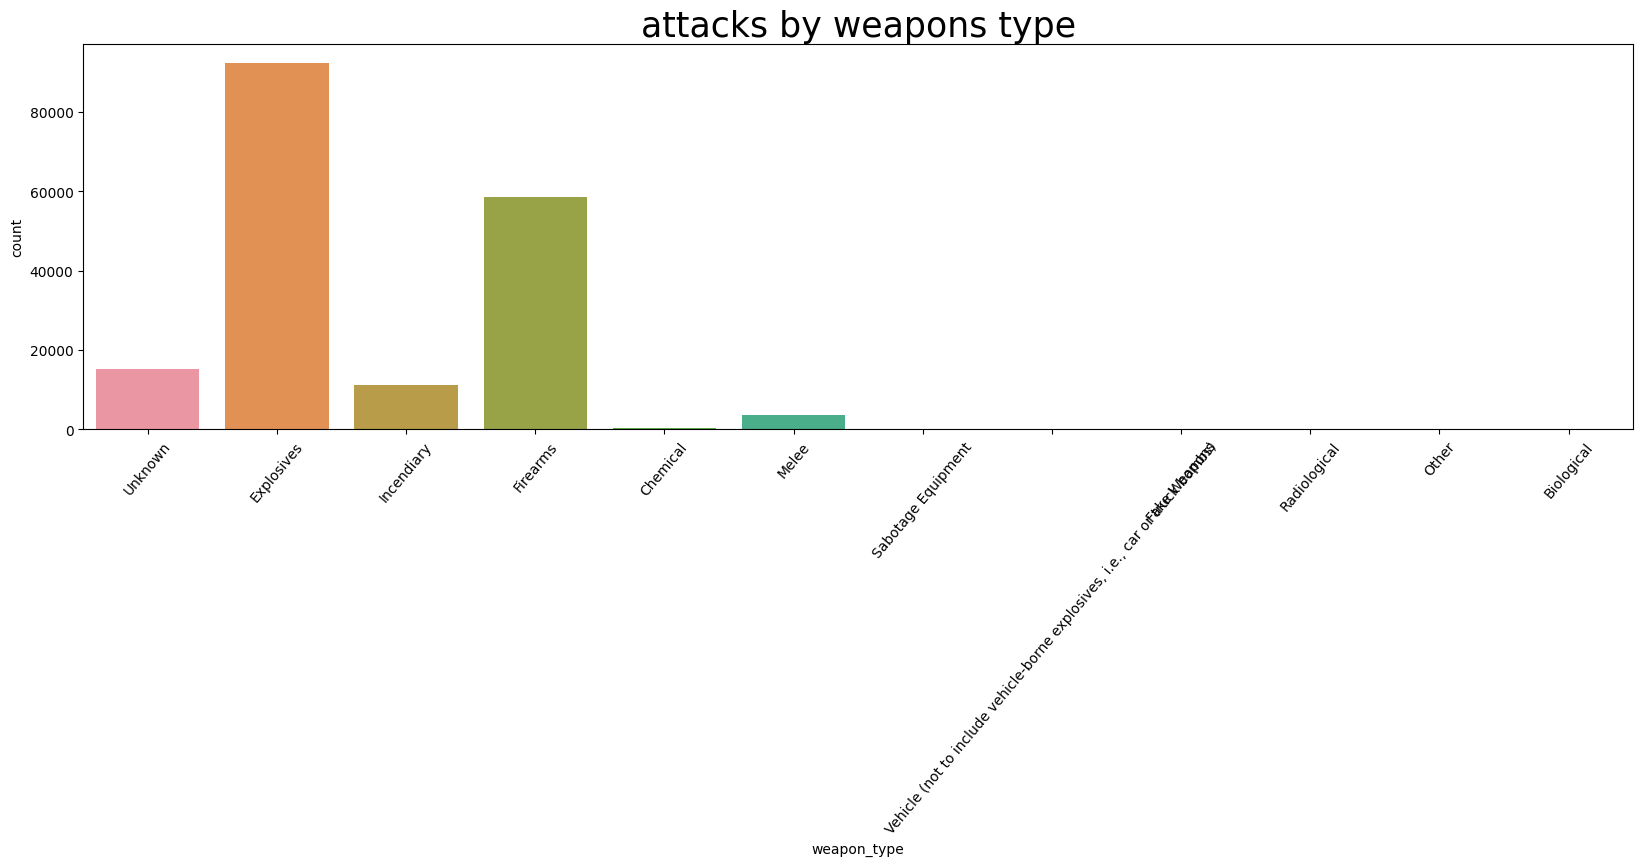

In [59]:
plt.figure(figsize=(20,5));
plt.xticks(rotation=50)
plt.title('attacks by weapons type', fontsize=25)
sns.countplot(x=t_df.weapon_type);

##### Attacks by year

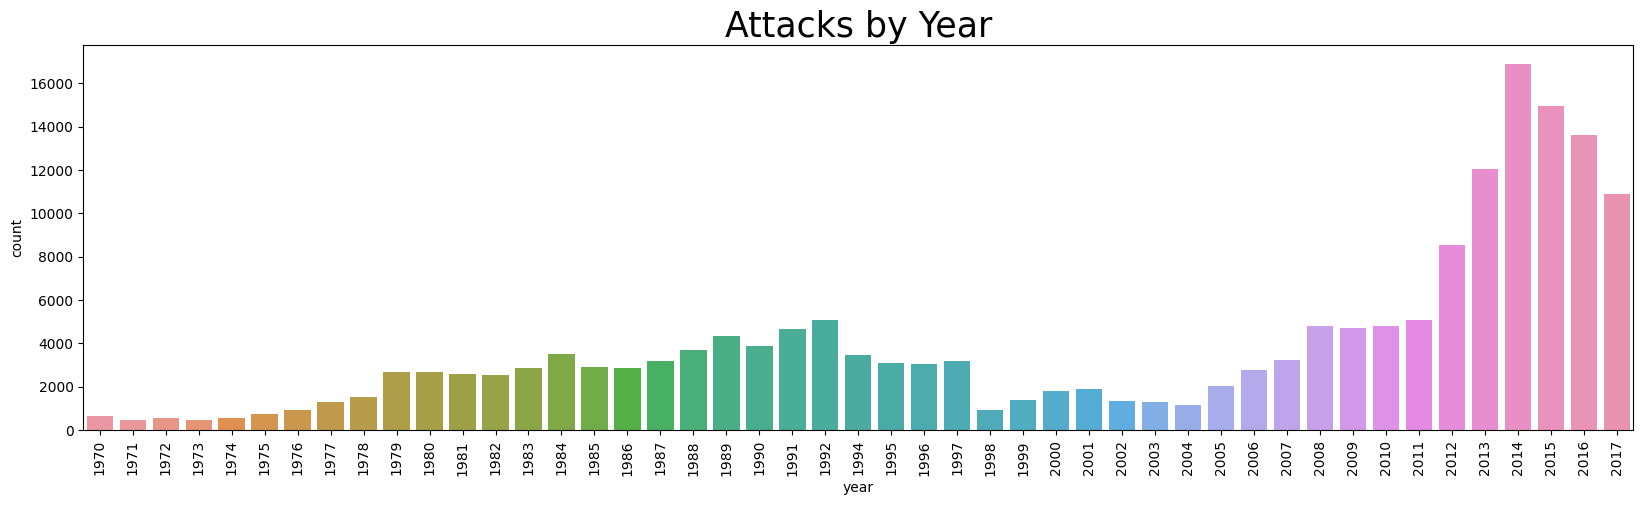

In [60]:
plt.figure(figsize=(20,5));
plt.xticks(rotation=90)
plt.title('Attacks by Year' , fontsize=25)
sns.countplot(x=t_df.year);

#### Attacks by month

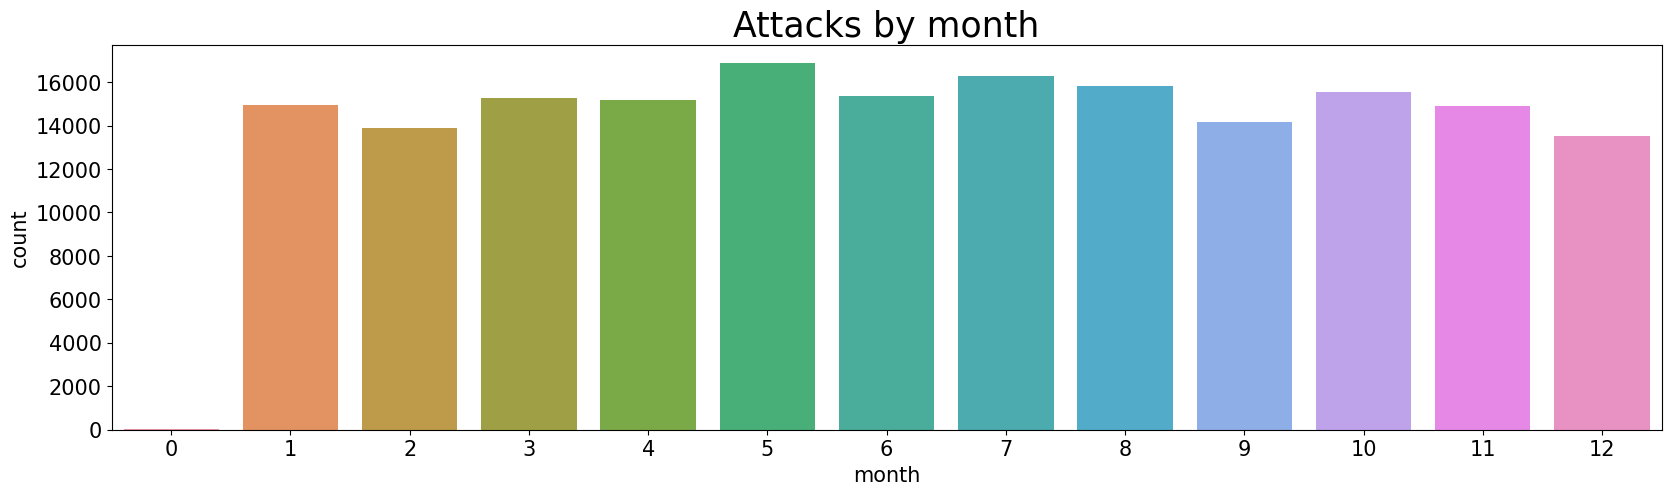

In [90]:
plt.figure(figsize=(20,5));
plt.title('Attacks by month', fontsize = 25)
sns.countplot(x=t_df.month);

#### Attacks by day

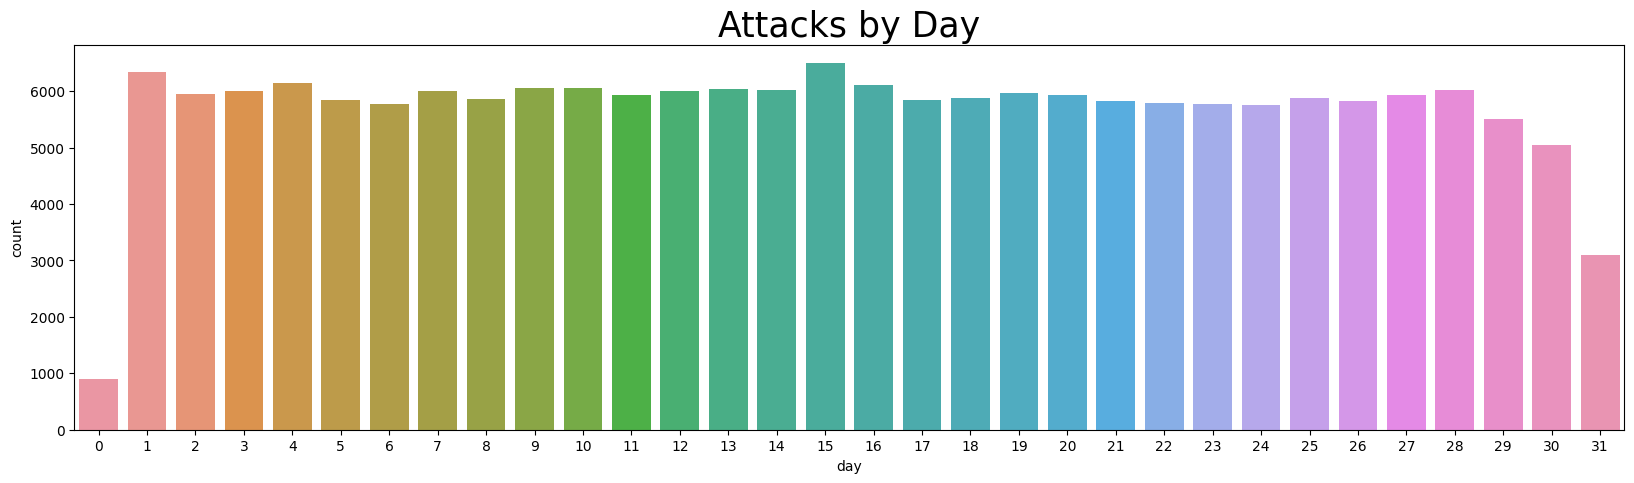

In [67]:
plt.figure(figsize=(20,5));
plt.title('Attacks by Day', fontsize= 25)
sns.countplot(x=t_df.day);

#### Cities with most attacks

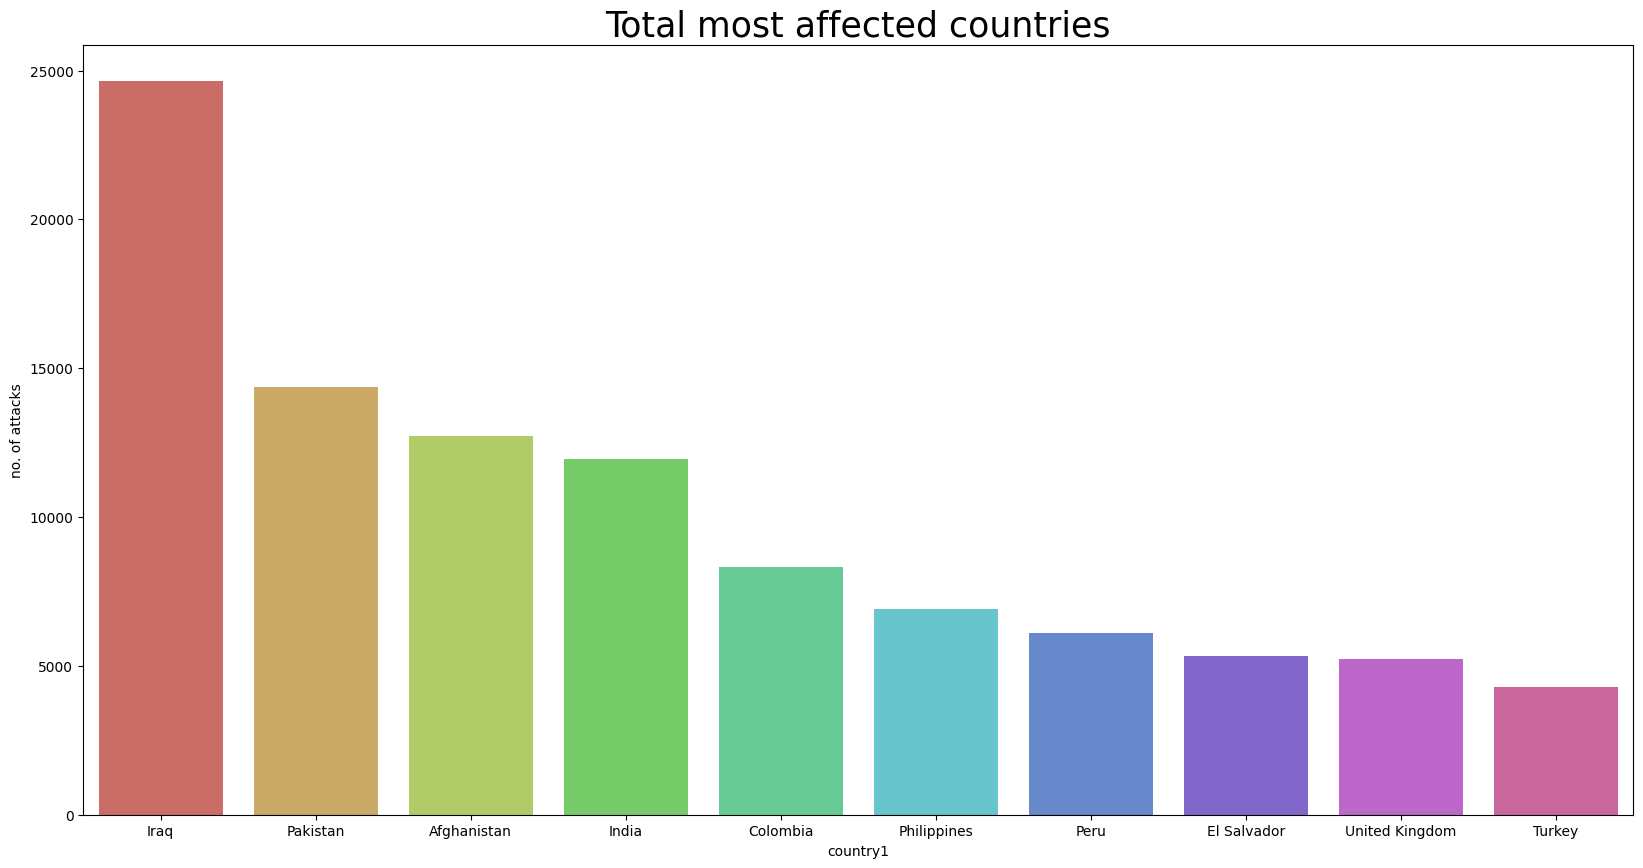

In [84]:
plt.subplots(figsize=(20,10))
sns.barplot(x = t_df['country1'].value_counts()[:10].index, y = t_df['country1'].value_counts()[:10].values,palette='hls')
plt.title('Total most affected countries' , fontsize=25)
plt.xlabel('country1')
plt.ylabel('no. of attacks')
plt.xticks(rotation = 0)
plt.show()

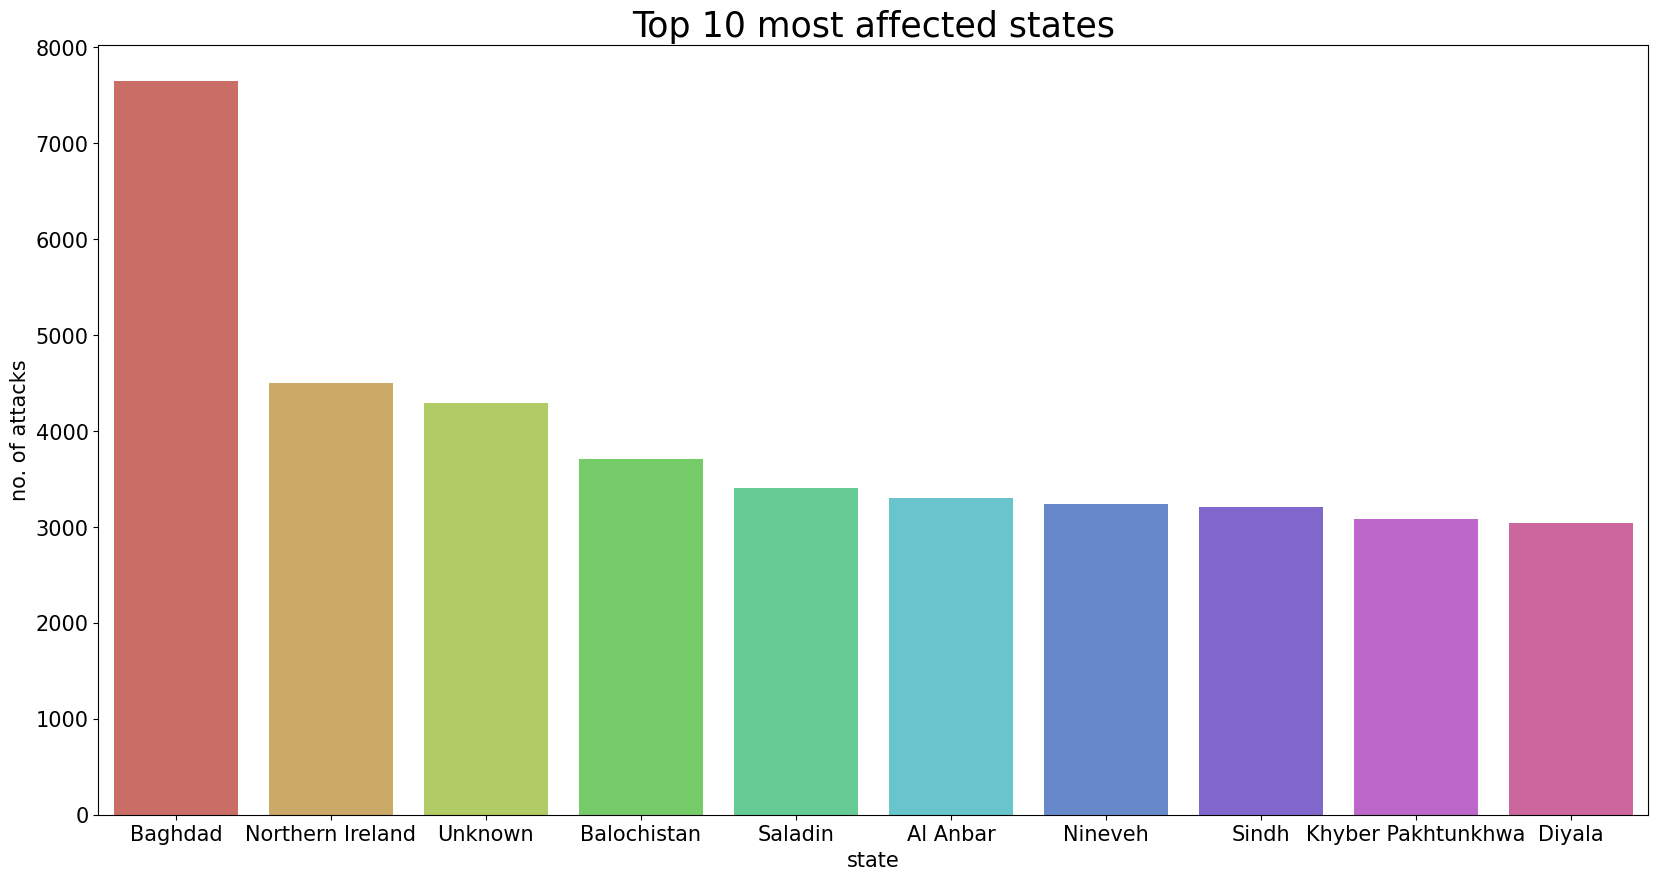

In [91]:
plt.subplots(figsize=(20,10))
sns.barplot(x = t_df['state'].value_counts()[:10].index, y = t_df['state'].value_counts()[:10].values,palette='hls')
plt.title('Top 10 most affected states' , fontsize=25)
plt.xlabel('state')
plt.ylabel('no. of attacks')
plt.xticks(rotation = 0)
plt.show()

#### Attacks by region

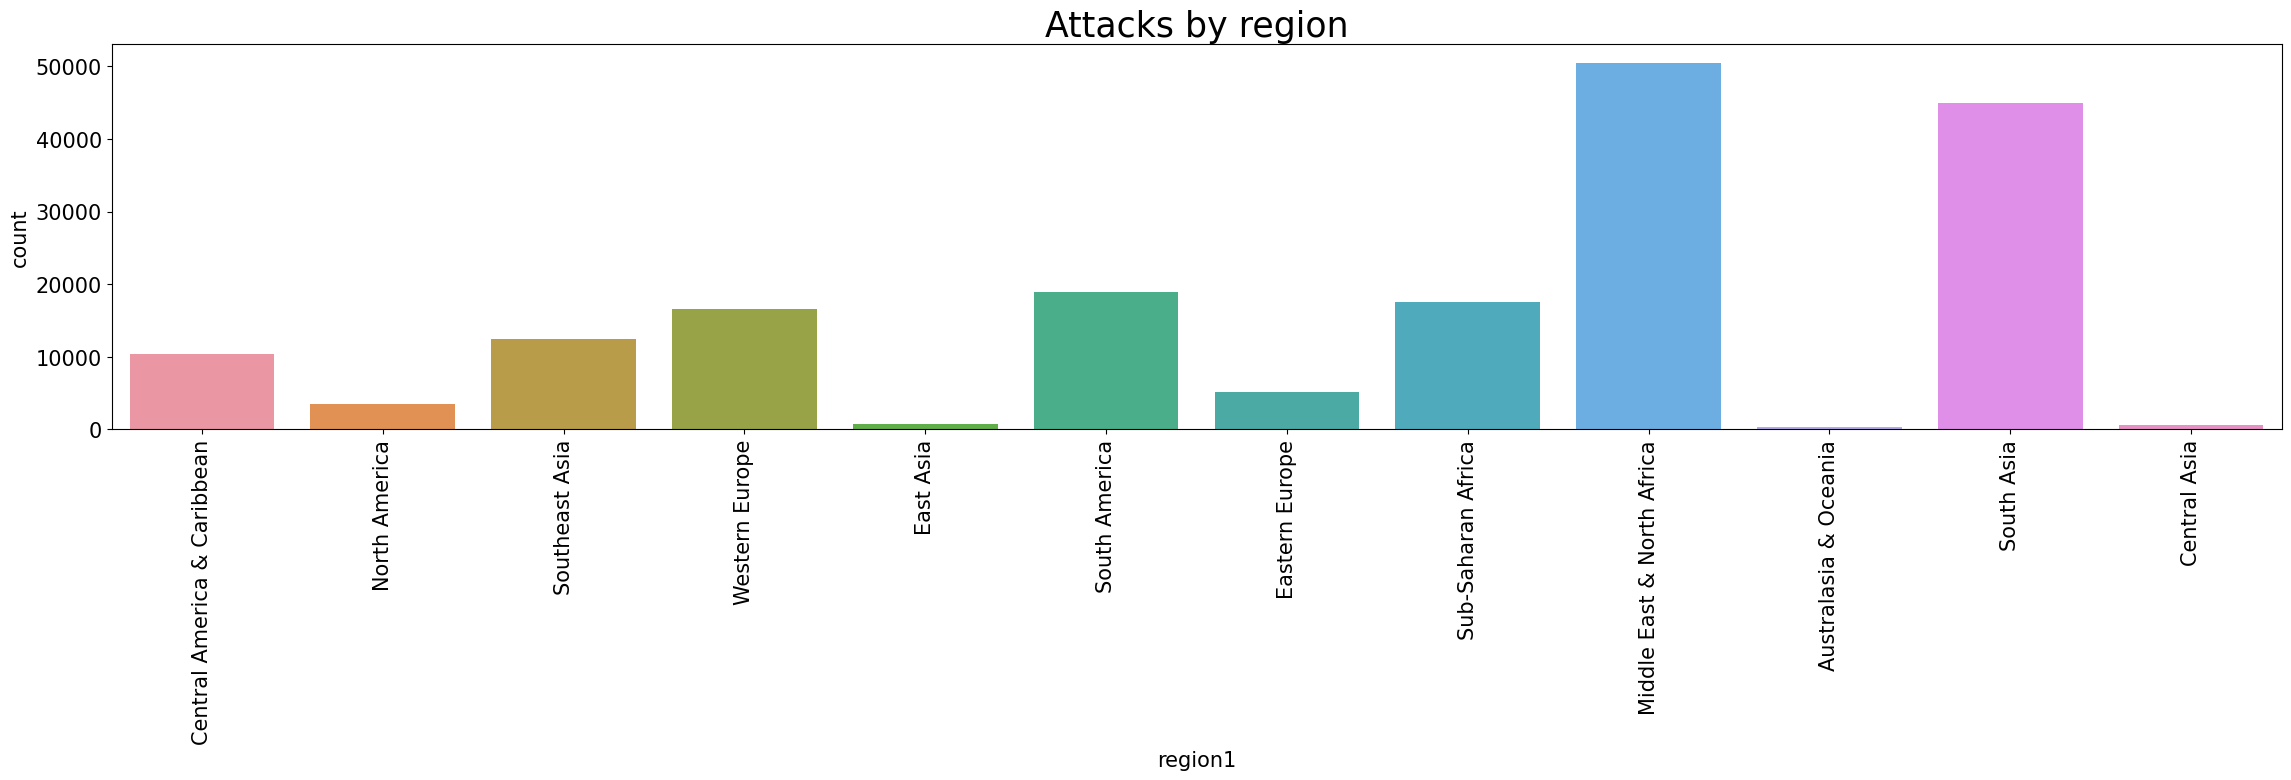

In [87]:
plt.figure(figsize=(28,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation=90)
plt.title('Attacks by region', fontsize = 25)
sns.countplot(x=t_df.region1);

#### Attacks based on target type

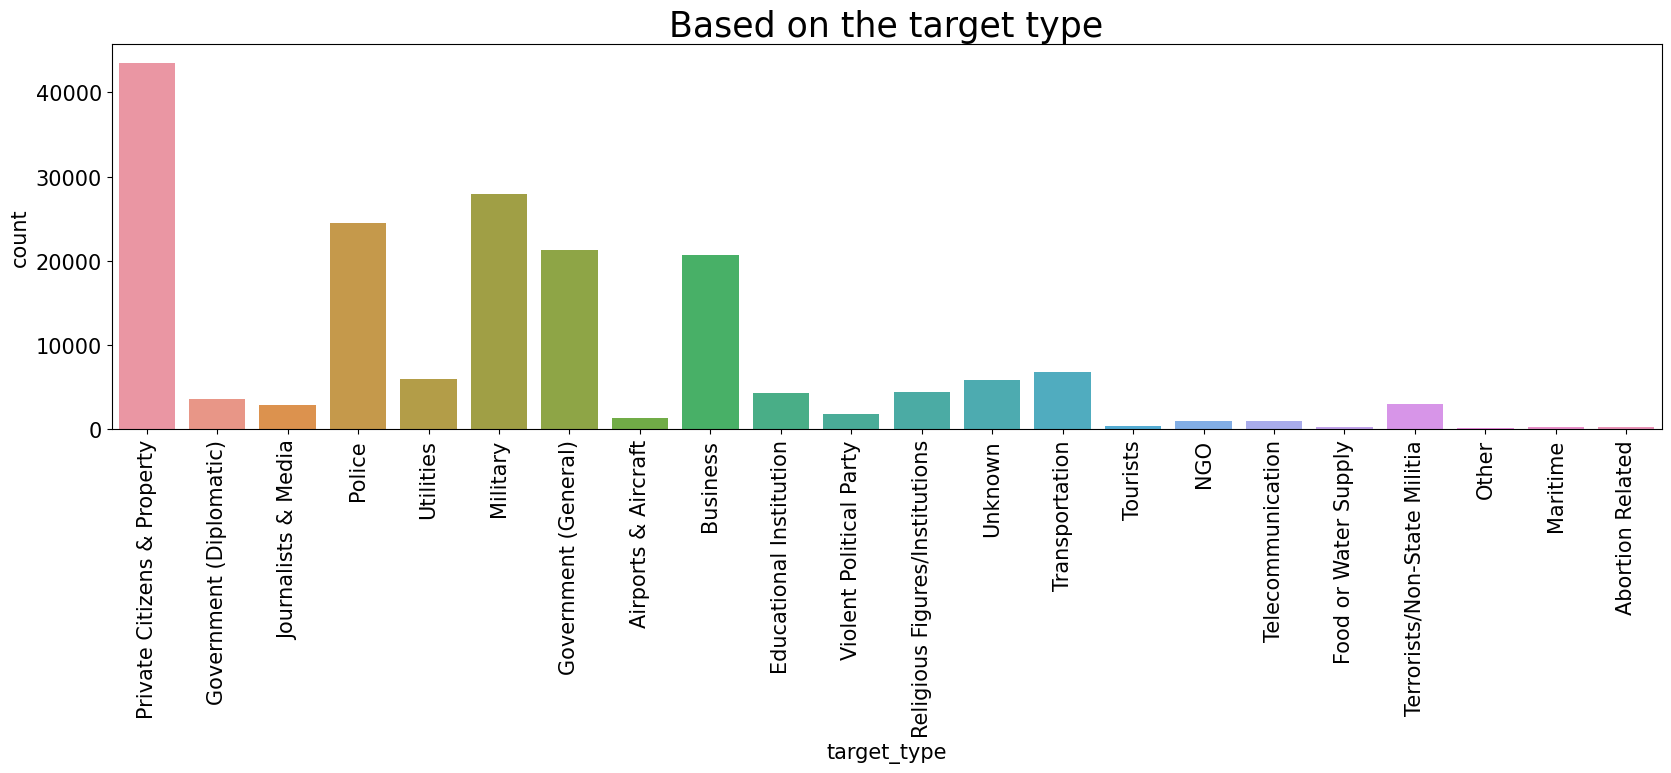

In [92]:
plt.figure(figsize=(20,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation=90)
plt.title('Based on the target type', fontsize = 25)
sns.countplot(x=t_df.target_type);

#### Attacks based on the attack type

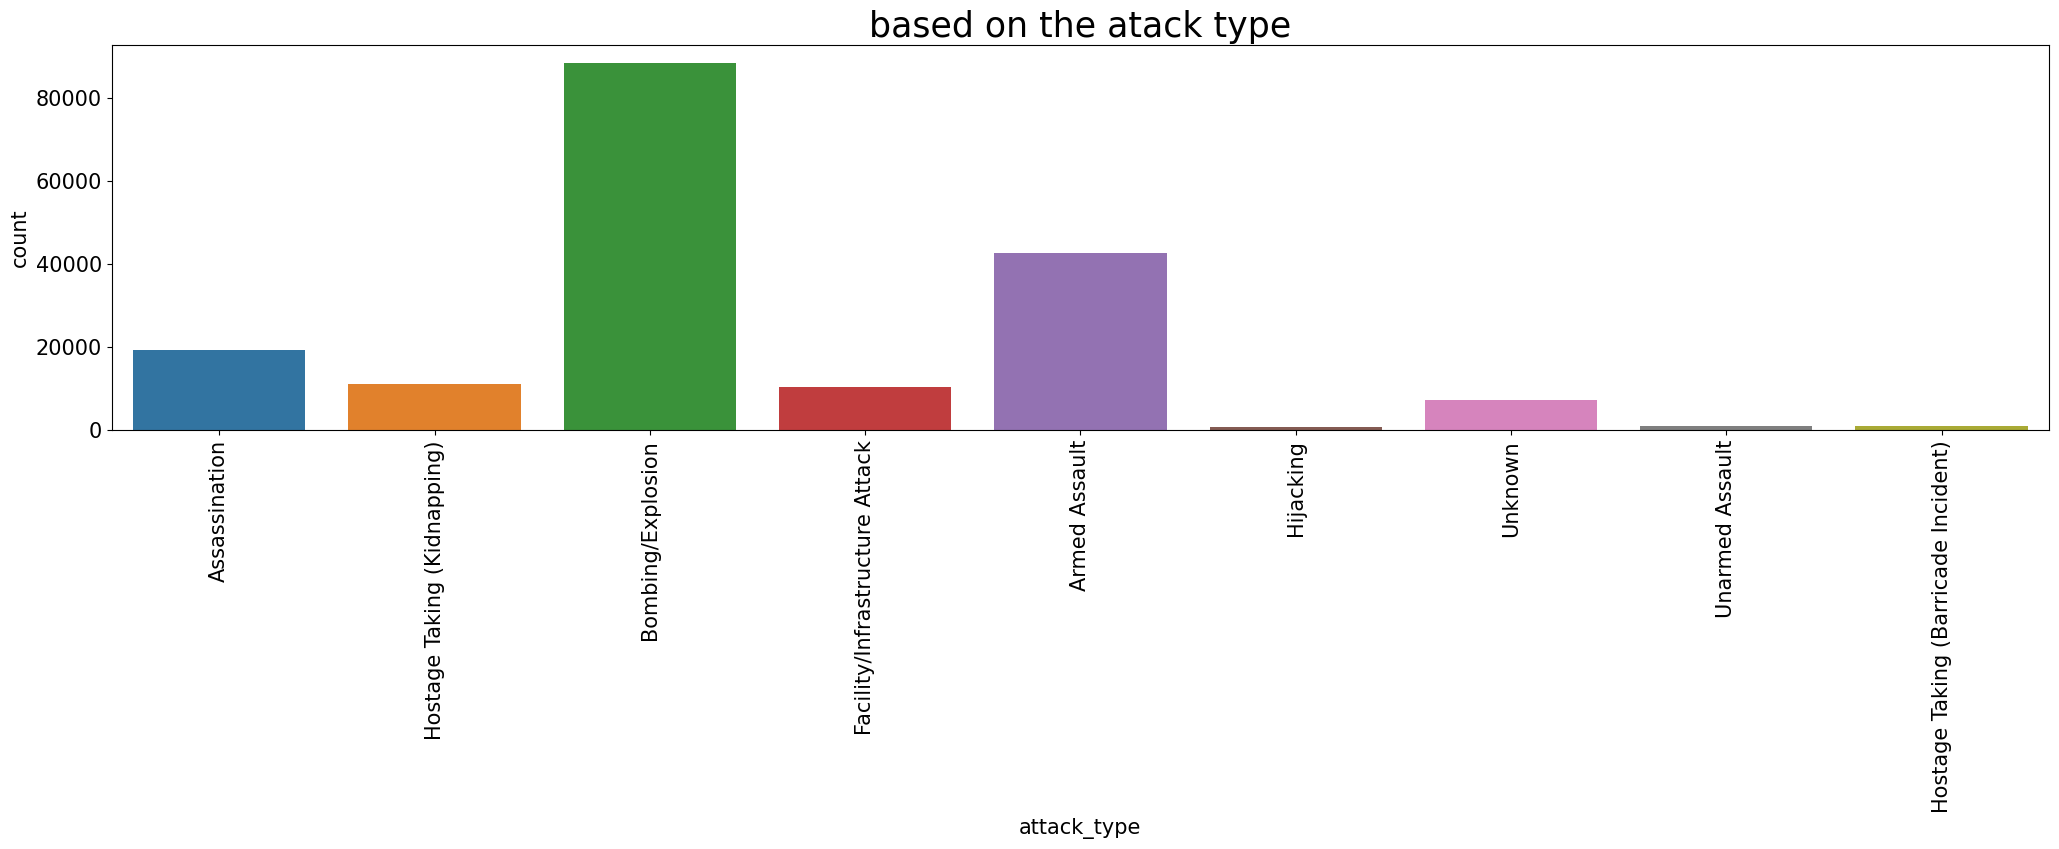

In [89]:
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation=90)
plt.title('based on the atack type', fontsize = 25)
sns.countplot(x=t_df.attack_type);